# Description

This Notebook is trying to train a dataset of the middle tier of hoursing price in US county breakdown with Random Forest Regression. We have the location info as States codes, and the monthly view of housing price in the past 20 years. We want to predict the housing value of July 2022, and compare it with the value/actual price Zillow predicted.

https://www.zillow.com/research/data/

In [30]:
import numpy as np 
import pandas as pd

from sklearn.model_selection import train_test_split
from rfpimp import *
from sklearn.ensemble import RandomForestRegressor
import statistics

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
from scipy import stats
from scipy.stats import norm

# Functions we can use later

#from sklearn.metrics import accuracy_score
#import tensorflow as tf
#from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [9]:
Mid_df = pd.read_csv("../Data/County_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
Mid_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,2000-01-31,...,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31
0,3101,0,Los Angeles County,County,CA,CA,Los Angeles-Long Beach-Anaheim,6,37,214234.0,...,800051.0,804554.0,809855.0,814969.0,823298.0,837794.0,855357.0,870495.0,872160.0,871661.0
1,139,1,Cook County,County,IL,IL,Chicago-Naperville-Elgin,17,31,178667.0,...,296654.0,299606.0,302385.0,305006.0,306796.0,309418.0,311618.0,315149.0,318010.0,320045.0
2,1090,2,Harris County,County,TX,TX,Houston-The Woodlands-Sugar Land,48,201,115635.0,...,253539.0,256142.0,259224.0,262435.0,266082.0,270808.0,275920.0,280925.0,284789.0,287346.0
3,2402,3,Maricopa County,County,AZ,AZ,Phoenix-Mesa-Scottsdale,4,13,144742.0,...,427585.0,433747.0,439547.0,445354.0,454125.0,463482.0,475158.0,484143.0,490573.0,488129.0
4,2841,4,San Diego County,County,CA,CA,San Diego-Carlsbad,6,73,225185.0,...,805310.0,812773.0,823998.0,844239.0,864353.0,887333.0,906549.0,919704.0,919171.0,907871.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2831,425,3101,Camas County,County,ID,ID,Hailey,16,25,NaN,...,196467.0,197414.0,203425.0,208336.0,214207.0,216584.0,220489.0,222531.0,227083.0,229719.0
2832,1648,3102,Daggett County,County,UT,UT,NaN,49,9,NaN,...,278916.0,281675.0,288672.0,294089.0,298309.0,298207.0,299034.0,300513.0,305849.0,311409.0
2833,2345,3112,Hinsdale County,County,CO,CO,NaN,8,53,NaN,...,388108.0,388829.0,394434.0,401427.0,408375.0,410835.0,412281.0,414823.0,423235.0,431385.0
2834,1933,3122,Mineral County,County,CO,CO,NaN,8,79,NaN,...,350767.0,351870.0,354173.0,356118.0,357979.0,357527.0,359385.0,362830.0,370106.0,375989.0


In [70]:
julyMid_df=Mid_df[['RegionID', 'RegionName','StateName', 'StateCodeFIPS','MunicipalCodeFIPS','2016-07-31','2017-07-31','2018-07-31','2019-07-31','2020-07-31','2021-07-31','2022-04-30','2022-05-31','2022-06-30','2022-07-31']]
julyMid_df.nunique()

RegionID             2836
RegionName           1716
StateName              51
StateCodeFIPS          51
MunicipalCodeFIPS     292
2016-07-31           2566
2017-07-31           2595
2018-07-31           2663
2019-07-31           2713
2020-07-31           2747
2021-07-31           2786
2022-04-30           2812
2022-05-31           2816
2022-06-30           2824
2022-07-31           2822
dtype: int64

In [72]:
julyMid_df=julyMid_df.dropna()
julyMid_df.shape
#july_df=july_df.drop(columns=['RegionID','RegionName'])

(2544, 15)

In [14]:
Region_df=julyMid_df[['RegionID','RegionName']]
Region_df

,RegionID,RegionName
0,3101,Los Angeles County
1,139,Cook County
2,1090,Harris County
3,2402,Maricopa County
4,2841,San Diego County
...,...,...
2831,425,Camas County
2832,1648,Daggett County
2833,2345,Hinsdale County
2834,1933,Mineral County


In [20]:
julyMid2022 = julyMid_df['2022-07-31']
julyMid_avg_price=julyMid2022.mean()
print(f'Average housing price of the Middle Tier in the United States is ${julyMid_avg_price}')

Average housing price of the Middle Tier in the United States is $240847.66981132075


In [23]:
bystate=julyMid_df.groupby(['StateName']).mean()
bystate=bystate.reset_index()
bystate.head()

,StateName,RegionID,StateCodeFIPS,MunicipalCodeFIPS,2020-07-31,2021-07-31,2022-07-31
0,AK,2864.571429,2.0,113.142857,296292.714286,312411.857143,339593.857143
1,AL,1595.698413,1.0,67.000000,122231.317460,137462.111111,158774.793651
2,AR,1586.205479,5.0,75.328767,98212.452055,108959.041096,125925.260274
3,AZ,1376.533333,4.0,13.866667,227331.400000,286466.266667,354062.266667
4,CA,1779.070175,6.0,57.105263,476398.543860,567211.000000,650704.596491


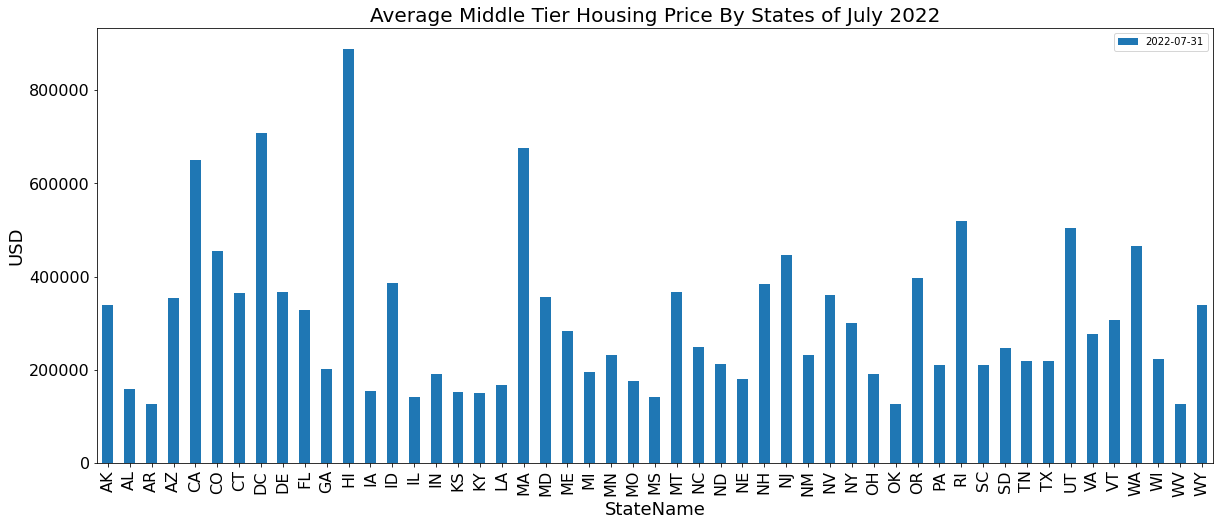

In [27]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# bystate.plot(kind="bar", color="red")
bystate.plot.bar('StateName','2022-07-31', style='-o')
plt.xlabel('StateName', size=18)
plt.ylabel('USD', size=18)
plt.xticks(rotation=90,size=16)
plt.yticks(size=16)
plt.title("Average Middle Tier Housing Price By States of July 2022", size=20)
plt.rcParams["figure.figsize"] = (20,8)
plt.show()

/Users/bibowang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


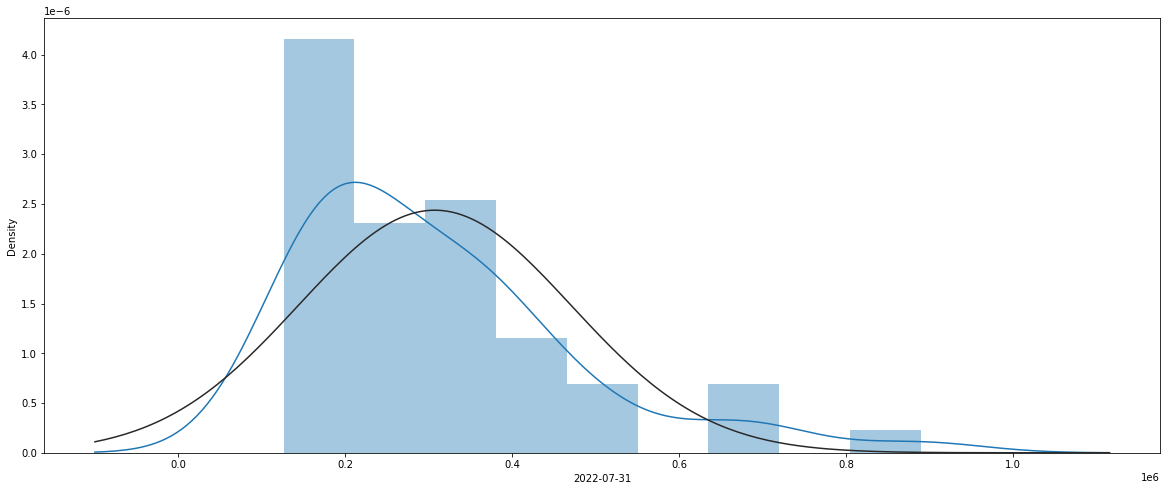

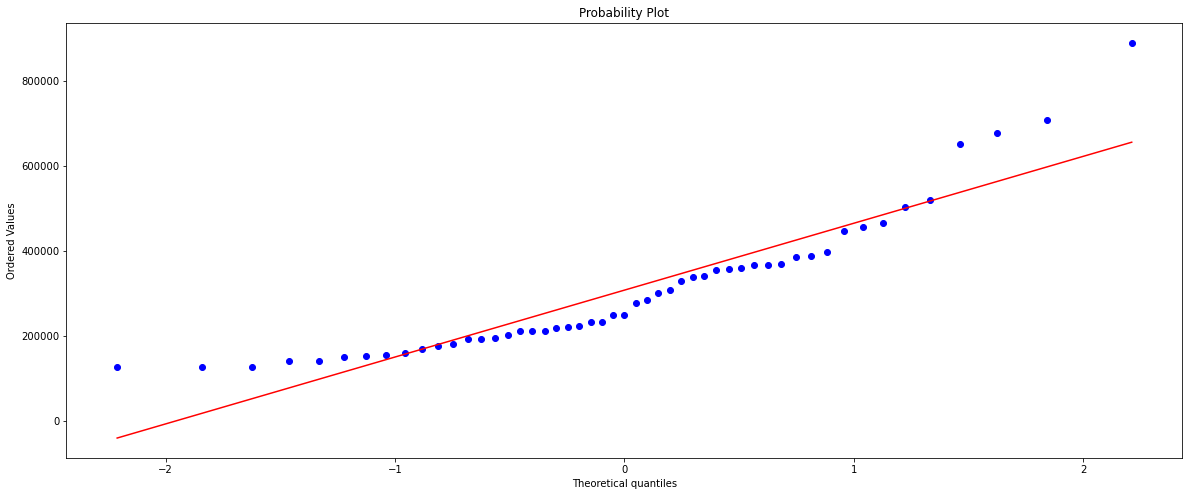

In [31]:
import seaborn as sns
from scipy import stats
from scipy.stats import norm

sns.distplot(bystate['2022-07-31'], fit=norm);
fig = plt.figure()
res = stats.probplot(bystate['2022-07-31'], plot=plt)

## Try Train the Model

In [42]:
X, y = julyMid_df[['StateCodeFIPS','MunicipalCodeFIPS','2020-07-31','2021-07-31']], julyMid_df['2022-07-31']
print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [43]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100) # use 10 trees
rf.fit(X, y)

RandomForestRegressor()

In [44]:
unknown_x = [6,37, 330000, 350000]
predicted_y = rf.predict([unknown_x])
print(predicted_y)

[409093.45]


/Users/bibowang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [45]:
from sklearn.metrics import mean_absolute_error

predictions = rf.predict(X)
e = mean_absolute_error(y, predictions)
ep = e*100.0/y.mean()
print(f"${e:.0f} average error; {ep:.2f}% error")

$3639 average error; 1.51% error


# Train & Test 1 - 2 locations + 2 previous July data features

In [52]:
from sklearn.model_selection import train_test_split

X, y = julyMid_df[['StateCodeFIPS','MunicipalCodeFIPS','2020-07-31','2021-07-31']], julyMid_df['2022-07-31']
# 20% of data goes into test set, 80% into training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train, y_train)

validation_e = mean_absolute_error(y_test, rf.predict(X_test))
print(f"${validation_e:.0f} average error; {validation_e*100.0/y.mean():.2f}% error")



$10665 average error; 4.43% error


## Improve the accuracy

In [53]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

validation_e = mean_absolute_error(y_test, rf.predict(X_test))
print(f"${validation_e:.0f} average error; {validation_e*100.0/y.mean():.2f}% error")

$10377 average error; 4.31% error


In [54]:
rf = RandomForestRegressor(n_estimators=100,
                           n_jobs=-1,
                           oob_score=True)   # get error estimate
rf.fit(X_train, y_train)
noisy_oob_r2 = rf.oob_score_
print(f"OOB score {noisy_oob_r2:.4f}")


OOB score 0.9812


## Importance

In [55]:
from rfpimp import *
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
I = importances(rf, X_test, y_test)
I

,Importance
Feature,
2021-07-31,1.972151
2020-07-31,0.005659
StateCodeFIPS,0.001342
MunicipalCodeFIPS,-0.000305


# Train & Test 2 - 1 locations + 2 previous July data features

In [65]:
X, y = julyMid_df[['StateCodeFIPS','2020-07-31','2021-07-31']], julyMid_df['2022-07-31']
# 20% of data goes into test set, 80% into training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

validation_e = mean_absolute_error(y_test, rf.predict(X_test))
print(f"${validation_e:.0f} average error; {validation_e*100.0/y.mean():.2f}% error")


$9301 average error; 3.76% error


### Importance

In [58]:
from rfpimp import *
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
I = importances(rf, X_test, y_test)
I

,Importance
Feature,
2021-07-31,1.907896
StateCodeFIPS,0.003103
2020-07-31,-0.000576


# Train & Test 3 - 1 locations + 6 previous July data features

In [102]:
X, y = julyMid_df[['StateCodeFIPS','2016-07-31','2017-07-31','2018-07-31','2019-07-31','2020-07-31','2021-07-31']], julyMid_df['2022-07-31']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

validation_e = mean_absolute_error(y_test, rf.predict(X_test))
print(f"${validation_e:.0f} average error; {validation_e*100.0/y.mean():.2f}% error")

$11936 average error; 4.83% error


In [103]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
I = importances(rf, X_test, y_test)
I

,Importance
Feature,
2021-07-31,1.934372
StateCodeFIPS,-0.001951
2020-07-31,-0.002408
2016-07-31,-0.003996
2019-07-31,-0.004192
2018-07-31,-0.004621
2017-07-31,-0.004770


# Train & Test 4 - 1 locations + 1 previous July + 3 recent month data features

In [132]:
X, y = julyMid_df[['StateCodeFIPS','2022-04-30','2022-05-31','2022-06-30','2021-07-31']], julyMid_df['2022-07-31']

X_train, X_test, y_train, y_test = train_test_split(X, y) 
#test_size=0.2

rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train, y_train)

validation_e = mean_absolute_error(y_test, rf.predict(X_test))
print(f"${validation_e:.0f} average error; {validation_e*100.0/y.mean():.2f}% error")

$1929 average error; 0.78% error


In [133]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
I = importances(rf, X_test, y_test)
I

,Importance
Feature,
2022-06-30,1.415590
2022-05-31,0.038934
2022-04-30,0.020252
StateCodeFIPS,0.000328
2021-07-31,-0.000543


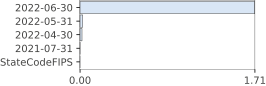

In [106]:
plot_importances(I.head(15))

# Train & Test 5 - 1 locations + 3 recent month data features

In [117]:
X, y = julyMid_df[['StateCodeFIPS','2022-04-30','2022-05-31','2022-06-30']], julyMid_df['2022-07-31']

X_train, X_test, y_train, y_test = train_test_split(X, y) 
#test_size=0.2

rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train, y_train)

validation_e = mean_absolute_error(y_test, rf.predict(X_test))
print(f"${validation_e:.0f} average error; {validation_e*100.0/y.mean():.2f}% error")

$1491 average error; 0.60% error


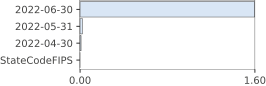

In [118]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
I = importances(rf, X_test, y_test)
I
plot_importances(I.head(15))

# Train & Test 6 - 1 most recent month data features

In [127]:
X, y = julyMid_df[['StateCodeFIPS','2022-06-30']], julyMid_df['2022-07-31']

X_train, X_test, y_train, y_test = train_test_split(X, y) 
#test_size=0.2

rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train, y_train)

validation_e = mean_absolute_error(y_test, rf.predict(X_test))
print(f"${validation_e:.0f} average error; {validation_e*100.0/y.mean():.2f}% error")

$2085 average error; 0.84% error


In [128]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
I = importances(rf, X_test, y_test)
I

,Importance
Feature,
2022-06-30,1.867362
StateCodeFIPS,-0.000214


# Get the Std of the value growth between June and July 2022

In [100]:
julyMid_df['6-7Grow†h'] = julyMid_df[['2022-06-30','2022-07-31']].pct_change(axis=1)['2022-07-31']
julyMid_df.head()

,RegionID,RegionName,StateName,StateCodeFIPS,MunicipalCodeFIPS,2016-07-31,2017-07-31,2018-07-31,2019-07-31,2020-07-31,2021-07-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,6-7Grow†h˙,6-7Grow†h
0,3101,Los Angeles County,CA,6,37,538644.0,573969.0,620719.0,623922.0,655169.0,777119.0,855357.0,870495.0,872160.0,871661.0,-0.000572,-0.000572
1,139,Cook County,IL,17,31,230726.0,243359.0,253638.0,257002.0,257763.0,287673.0,311618.0,315149.0,318010.0,320045.0,0.006399,0.006399
2,1090,Harris County,TX,48,201,179921.0,186392.0,194180.0,202173.0,208988.0,239489.0,275920.0,280925.0,284789.0,287346.0,0.008979,0.008979
3,2402,Maricopa County,AZ,4,13,232743.0,248113.0,266629.0,280483.0,307822.0,401621.0,475158.0,484143.0,490573.0,488129.0,-0.004982,-0.004982
4,2841,San Diego County,CA,6,73,502117.0,542351.0,577235.0,586615.0,616451.0,776488.0,906549.0,919704.0,919171.0,907871.0,-0.012294,-0.012294


In [101]:
JuneJulyGrowth=(julyMid_df['6-7Grow†h'].mean())*100
JuneJulyGrowth

1.0421303266330342

In [89]:
juneJulyStd=julyMid_df['6-7Grow†h']. std()
juneJulyStd*100

0.6356180098932094

In [90]:
juneJulyVar=julyMid_df['6-7Grow†h']. var()
juneJulyVar*100

0.004040102545006041

In [ ]:
states=july_df.StateName.value_counts()
states

In [ ]:
july_df['7/31/22']=july_df['7/31/22'].astype(float)
yoy_df=july_df[['7/31/20','7/31/21','7/31/22']]
yoy_df.dtypes

In [ ]:
yoy_df.head()

In [95]:
julyMid_df.std(axis=0)

/Users/bibowang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


RegionID                932.961909
StateCodeFIPS            15.402319
MunicipalCodeFIPS       109.678188
2016-07-31           105431.855063
2017-07-31           111055.392667
2018-07-31           119599.183769
2019-07-31           121871.453943
2020-07-31           124952.640920
2021-07-31           147713.656373
2022-04-30           169318.897003
2022-05-31           171635.872346
2022-06-30           173157.078262
2022-07-31           173725.235775
6-7Grow†h˙                0.006356
6-7Grow†h                 0.006356
dtype: float64

In [109]:
julyMid_df.std(axis=1)

/Users/bibowang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


0       370429.067066
1       139170.167736
2       119508.649557
3       199801.390863
4       380970.127923
            ...      
2829     94107.412383
2830    228035.475105
2831     94274.174051
2832    127795.725387
2835    164993.790652
Length: 2544, dtype: float64

In [110]:
df=julyMid_df[['2022-04-30','2022-05-31','2022-06-30','2022-07-31']]
df.std(axis=1)

0        8071.044186
1        3658.748830
2        4974.607589
3        6768.834975
4        7083.493553
            ...     
2829     3924.184533
2830     7831.861991
2831     4204.957828
2832     5626.437616
2835    10749.901860
Length: 2544, dtype: float64

In [130]:
df.std(axis=1).mean()

3459.824159006143

In [119]:
df2=julyMid_df[['2022-04-30','2022-05-31','2022-06-30']]
df2.std(axis=1)

0       9258.078256
1       3201.847019
2       4446.715679
3       7742.710012
4       7445.949660
           ...     
2829    2346.920536
2830    4772.089305
2831    3375.680277
2832    3584.795717
2835    5985.751610
Length: 2544, dtype: float64

In [137]:
#df2.plot.bar()

In [120]:
df2.std(axis=1).mean()

2692.233420250547

In [122]:
df3=julyMid_df[['2022-05-31','2022-06-30']]
df3.std(axis=1).mean()

2073.305736281313

In [135]:
df4=julyMid_df[['2022-04-30','2022-05-31','2022-06-30','2022-07-31']]
df4.std(axis=1).mean()

3459.824159006143

In [ ]:
# box plot
# bar chart